In [ ]:
# Import required packages
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

print("Kernel is working with regression-venv!")





Kernel is working with regression-venv!


In [2]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [8]:
# Load dataset
df = pd.read_csv(r"C:\Users\aduplooy\OneDrive - Ninety One\Documents\GitHub\2401PTDS_Regression_Project_ADP\co2_emissions_from_agri.csv")
# Quick check
print(df.shape)
df.head()

(6965, 31)


,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


In [ ]:
# Check for missing values
df.isnull().sum()


Area                                  0
Year                                  0
Savanna fires                        31
Forest fires                         93
Crop Residues                      1389
Rice Cultivation                      0
Drained organic soils (CO2)           0
Pesticides Manufacturing              0
Food Transport                        0
Forestland                          493
Net Forest conversion               493
Food Household Consumption          473
Food Retail                           0
On-farm Electricity Use               0
Food Packaging                        0
Agrifood Systems Waste Disposal       0
Food Processing                       0
Fertilizers Manufacturing             0
IPPU                                743
Manure applied to Soils             928
Manure left on Pasture                0
Manure Management                   928
Fires in organic soils                0
Fires in humid tropical forests     155
On-farm energy use                  956


In [13]:
# Check for missing values %s 
(df.isnull().sum() / len(df)) * 100


Area                                0.000000
Year                                0.000000
Savanna fires                       0.445083
Forest fires                        1.335248
Crop Residues                      19.942570
Rice Cultivation                    0.000000
Drained organic soils (CO2)         0.000000
Pesticides Manufacturing            0.000000
Food Transport                      0.000000
Forestland                          7.078248
Net Forest conversion               7.078248
Food Household Consumption          6.791098
Food Retail                         0.000000
On-farm Electricity Use             0.000000
Food Packaging                      0.000000
Agrifood Systems Waste Disposal     0.000000
Food Processing                     0.000000
Fertilizers Manufacturing           0.000000
IPPU                               10.667624
Manure applied to Soils            13.323762
Manure left on Pasture              0.000000
Manure Management                  13.323762
Fires in o

Average Temperature °C             1.000000
Year                               0.545932
Food Transport                     0.075724
Food Retail                        0.073404
IPPU                               0.062616
Food Household Consumption         0.055263
Food Processing                    0.053083
Manure applied to Soils            0.044167
On-farm energy use                 0.041692
Fertilizers Manufacturing          0.041462
Food Packaging                     0.040767
Urban population                   0.036263
Manure Management                  0.033937
Drained organic soils (CO2)        0.029030
Pesticides Manufacturing           0.027960
Crop Residues                      0.019434
total_emission                     0.019043
On-farm Electricity Use            0.009081
Agrifood Systems Waste Disposal    0.008995
Total Population - Female          0.005456
Total Population - Male            0.003623
Manure left on Pasture            -0.015928
Rural population                

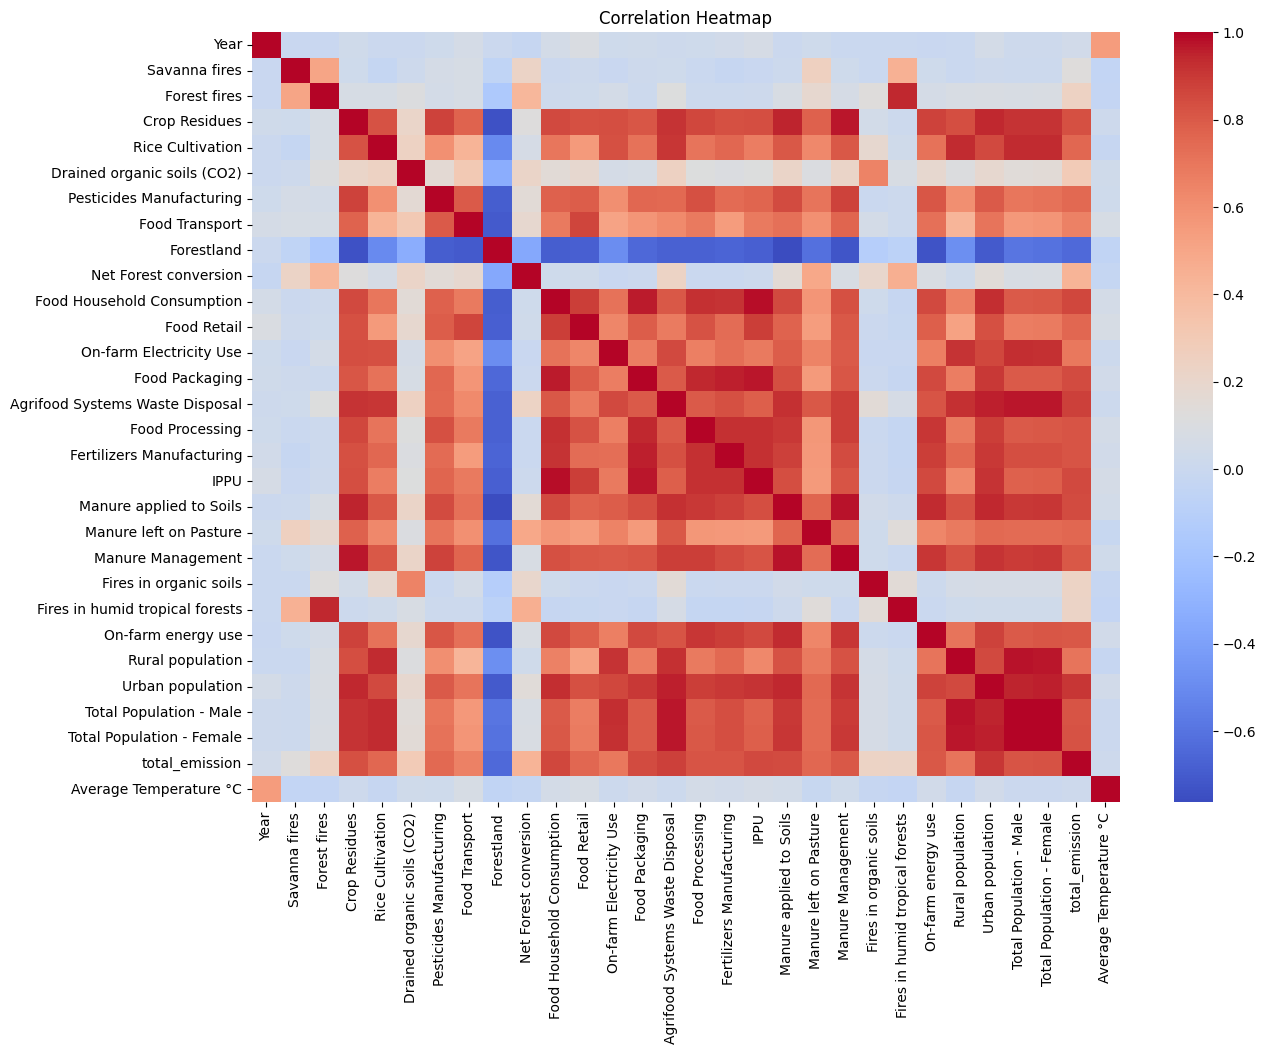

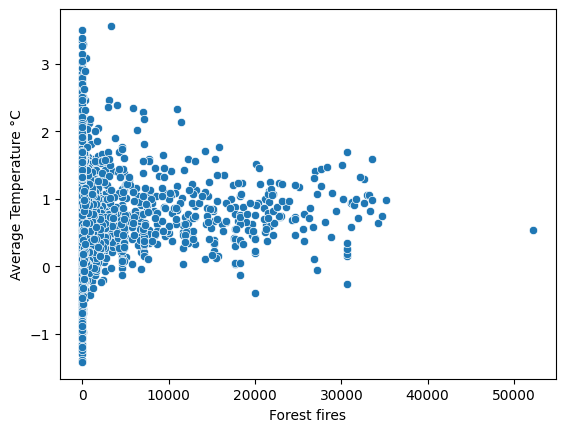

In [16]:
# Check correlations
corr = df.corr(numeric_only=True)
target_corr = corr['Average Temperature °C'].sort_values(ascending=False)
print(target_corr)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,10))
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

sns.scatterplot(data=df, x='Forest fires', y='Average Temperature °C')
plt.show()



**Correlation Intepretations**
Key Takeaways from Correlation Results

Strong correlation: Year (0.55) → very strong, makes sense (temperature rising over time).

Weak but positive correlations (~0.05–0.08):

Food Transport, Food Retail, IPPU, Food Household Consumption, Food Processing, Manure applied to Soils, On-farm energy use, etc.

These are candidates to keep, but their predictive power might be limited.

Very weak correlations (<0.03 absolute):

Crop Residues, total_emission, On-farm Electricity Use, Agrifood Systems Waste Disposal, Population fields, Manure left on Pasture.

These add little predictive power. If they also have missingness → drop.

Negative correlations:

Net Forest conversion, Fires in humid tropical forests, Forest fires, Savanna fires, Forestland (all between -0.03 and -0.05).

Weak negatives; unlikely to add value.

**Missing value analysis for imputation**

If <5% missing → fill with median/mean (for numeric), or mode (for categorical).

If >30% missing → consider dropping that column, unless it’s critical.

For population / emissions-related variables, median imputation usually works better than mean (less sensitive to outliers).

***Columns With Negligible Missingness (<5%)***

Savanna fires (0.44%)
Forest fires (1.34%)
Fires in humid tropical forests (2.22%)

Action: Safe to impute with median (numeric values, often skewed).

***Columns With Moderate Missingness (5–15%)***

Forestland (7.08%)
Net Forest conversion (7.08%)
Food Household Consumption (6.79%)
IPPU (10.7%)
Manure applied to Soils (13.3%)
Manure Management (13.3%)
On-farm energy use (13.7%)

Action: If these variables are important for your regression → impute with median.
If not strongly related to your target (Average Temperature °C), you can consider dropping one or two to simplify

***Columns With High Missingness (>15%)***

Crop Residues (19.9%)

Action:If it’s strongly correlated with target → impute with median. Otherwise, document dropping it (20% missing is high).

## 🔹 Data Cleaning: Missing Values & Feature Selection

### 1. Missing Value Analysis
We examined the percentage of missing values per feature. Results showed:
- Several variables with **negligible missingness (<5%)** such as *Savanna fires*, *Forest fires*, and *Fires in humid tropical forests*.  
- A few variables with **moderate missingness (5–15%)**, including *Food Household Consumption* (~7%), *IPPU* (~11%), and *Manure applied to Soils* (~13%).  
- One variable with **high missingness (~20%)**: *Crop Residues*.  

### 2. Correlation with Target Variable
We computed correlations against our target (**Average Temperature °C**):
- **Strong correlation**: *Year* (r ≈ 0.55).  
- **Weak positive correlation (~0.05–0.08)**: *Food Transport*, *Food Retail*, *Food Household Consumption*, *Food Processing*, *IPPU*, *On-farm energy use*.  
- **Very weak/near zero correlation (<0.03 absolute)**: *Crop Residues*, *total_emission*, *On-farm Electricity Use*, *Population fields*.  
- **Weak negative correlation (~-0.03 to -0.05)**: *Forestland*, *Net Forest conversion*, *Forest fires*, *Savanna fires*.  

### 3. Cleaning Decisions
- **Dropped**:  
  - *Crop Residues* → high missingness (≈20%) + very weak correlation.  
  - *Manure Management* & *Forestland* & *Net Forest conversion* → moderate missingness + weak/negative correlation.  
  - Fire-related variables (*Forest fires*, *Savanna fires*, *Fires in humid tropical forests*) → low correlation and limited predictive power.  

- **Kept (with median imputation if missing)**:  
  - *Year* (strong correlation).  
  - *Food Transport*, *Food Retail*, *Food Household Consumption*, *Food Processing*, *IPPU*, *On-farm energy use* (moderate correlation, reasonable missingness).  

### 4. Next Steps
- Apply **median imputation** to remaining features with missing values (<15%).  
- Re-run summary statistics to confirm dataset completeness.  
- Proceed to **Exploratory Data Analysis (EDA)** with the cleaned dataset.  


In [ ]:
# Drop columns with low correlation / predictive power
drop_cols = [
    'Crop Residues',
    'Manure Management',
    'Forestland',
    'Net Forest conversion',
    'Forest fires',
    'Savanna fires',
    'Fires in humid tropical forests'
]
df = df.drop(columns=drop_cols)


In [18]:
# Median Imputation for Remaining Features
# Identify numeric columns with missing values
missing_cols = df.columns[df.isnull().any()]

# Apply median imputation
for col in missing_cols:
    df[col] = df[col].fillna(df[col].median())


In [19]:
# Verify No Missing Values Remain
df.isnull().sum().sort_values(ascending=False).head(10)


Area                           0
Year                           0
Rice Cultivation               0
Drained organic soils (CO2)    0
Pesticides Manufacturing       0
Food Transport                 0
Food Household Consumption     0
Food Retail                    0
On-farm Electricity Use        0
Food Packaging                 0
dtype: int64

In [22]:
# Save the Cleaned Dataset
df.to_csv("co2_emissions_from_agri_clean.csv", index=False)




# 🔍 Exploratory Data Analysis (EDA)

In this section, we explore the cleaned dataset to understand distributions, relationships, and correlations between features and our target variable **Average Temperature °C**.

---

## 1. Summary Statistics
We begin by reviewing basic statistics for all numeric variables.


In [27]:
# Summary statistics
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Year,6965.0,2.005125e+03,8.894665e+00,1990.000000,1997.000000,2.005000e+03,2.013000e+03,2.020000e+03
Rice Cultivation,6965.0,4.259667e+03,1.761383e+04,0.000000,181.260800,5.348174e+02,1.536640e+03,1.649153e+05
Drained organic soils (CO2),6965.0,3.503229e+03,1.586145e+04,0.000000,0.000000,0.000000e+00,6.904088e+02,2.410251e+05
Pesticides Manufacturing,6965.0,3.334184e+02,1.429159e+03,0.000000,6.000000,1.300000e+01,1.163255e+02,1.645900e+04
Food Transport,6965.0,1.939582e+03,5.616749e+03,0.000100,27.958600,2.049628e+02,1.207001e+03,6.794576e+04
Food Household Consumption,6965.0,4.528935e+03,2.492591e+04,0.000000,13.797400,1.554711e+02,1.238669e+03,4.662882e+05
Food Retail,6965.0,2.043211e+03,8.494249e+03,0.000000,26.818500,1.720426e+02,1.075999e+03,1.337841e+05
On-farm Electricity Use,6965.0,1.626681e+03,9.343182e+03,0.000000,8.037600,2.912070e+01,4.999447e+02,1.656763e+05
Food Packaging,6965.0,1.658630e+03,1.148134e+04,0.000000,67.631366,7.401813e+01,2.817910e+02,1.757413e+05
Agrifood Systems Waste Disposal,6965.0,6.018445e+03,2.215674e+04,0.340000,86.680500,9.012757e+02,3.006442e+03,2.132897e+05


## 2. Missing Values Check
Confirm that our cleaning and imputation steps were successful.


In [28]:
df.isnull().sum().sort_values(ascending=False).head(10)


Area                           0
Year                           0
Rice Cultivation               0
Drained organic soils (CO2)    0
Pesticides Manufacturing       0
Food Transport                 0
Food Household Consumption     0
Food Retail                    0
On-farm Electricity Use        0
Food Packaging                 0
dtype: int64

## 3. Feature Distributions
We examine the distributions of numeric variables to detect skewness, outliers, and data ranges.


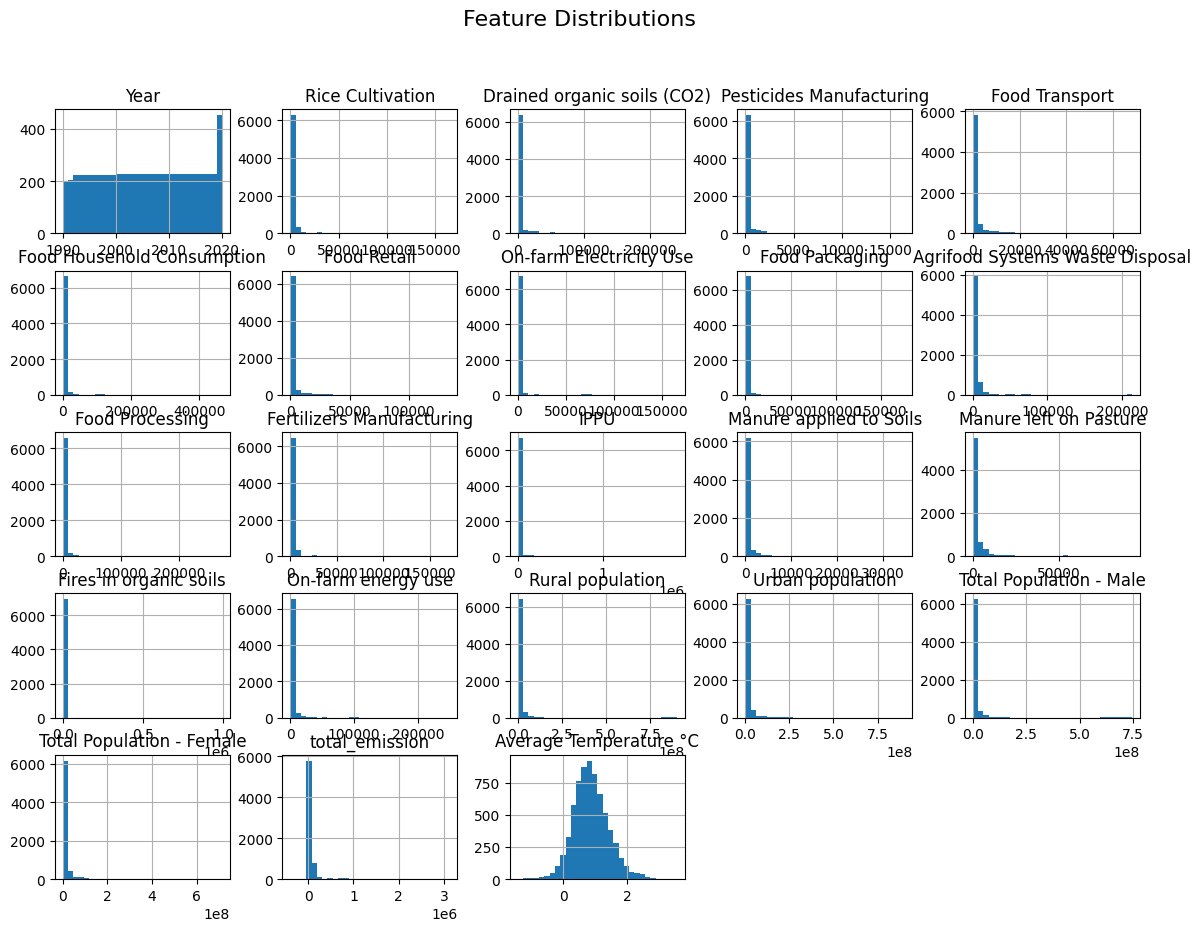

In [29]:
import matplotlib.pyplot as plt

df.hist(figsize=(14,10), bins=30)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


## 4. Correlation Analysis
We investigate how features correlate with each other and with the target variable (**Average Temperature °C**).


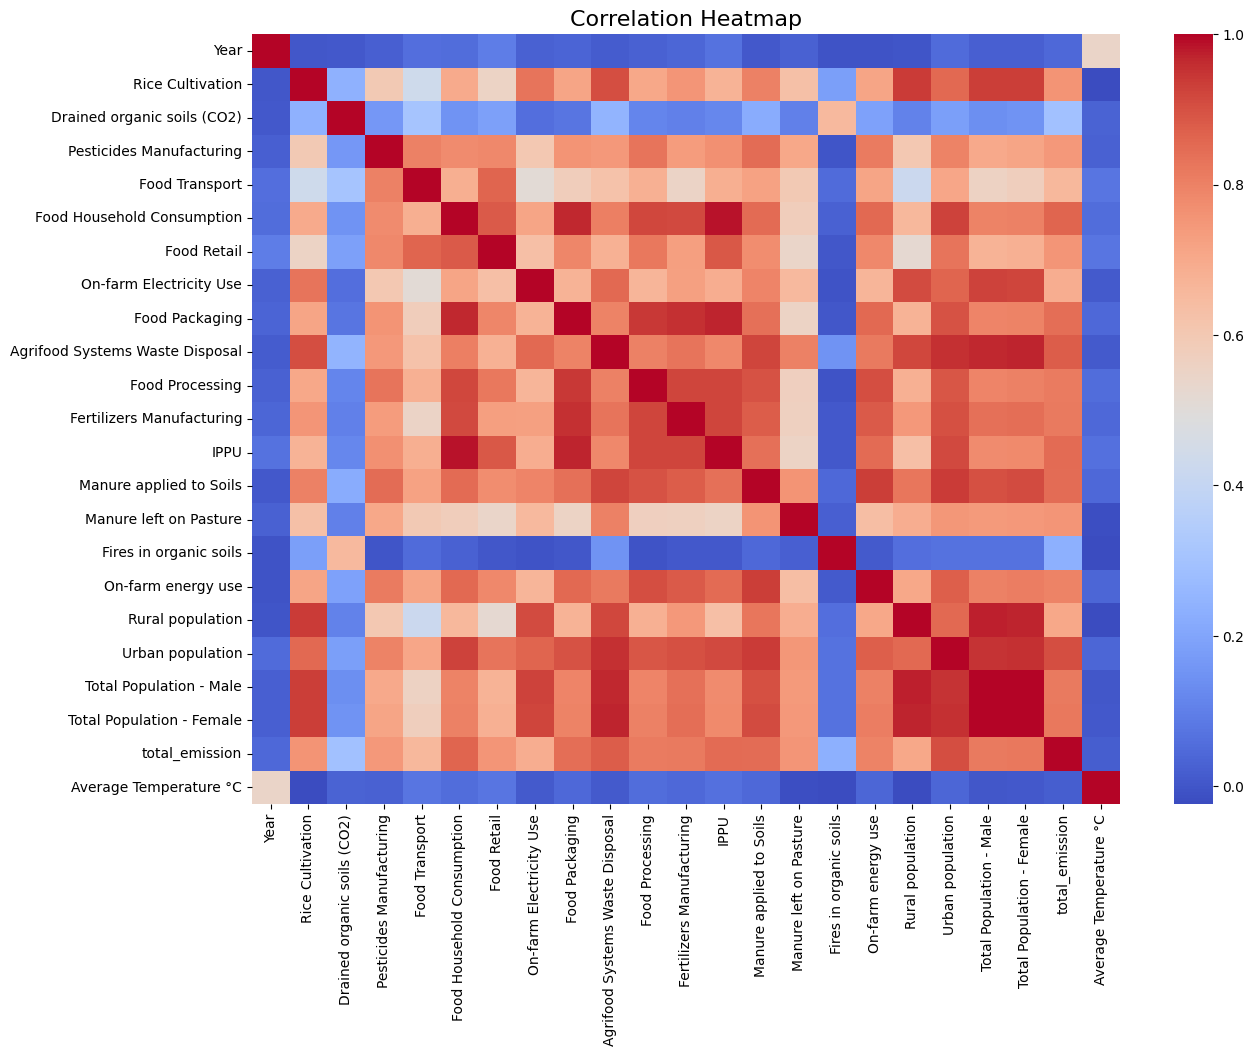

Average Temperature °C             1.000000
Year                               0.545932
Food Transport                     0.075724
Food Retail                        0.073404
IPPU                               0.062307
Food Household Consumption         0.055542
Food Processing                    0.053083
Manure applied to Soils            0.042268
Fertilizers Manufacturing          0.041462
Food Packaging                     0.040767
On-farm energy use                 0.039016
Urban population                   0.036263
Drained organic soils (CO2)        0.029030
Pesticides Manufacturing           0.027960
total_emission                     0.019043
On-farm Electricity Use            0.009081
Agrifood Systems Waste Disposal    0.008995
Total Population - Female          0.005456
Total Population - Male            0.003623
Manure left on Pasture            -0.015928
Rural population                  -0.019764
Rice Cultivation                  -0.022532
Fires in organic soils          

In [30]:
import seaborn as sns

plt.figure(figsize=(14,10))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

# Print correlation with target
df.corr(numeric_only=True)['Average Temperature °C'].sort_values(ascending=False)


## 5. Relationships with Target
We visualize scatterplots between selected features and the target to understand trends and linearity.


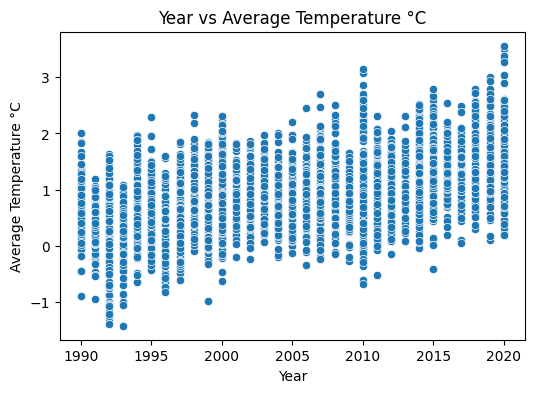

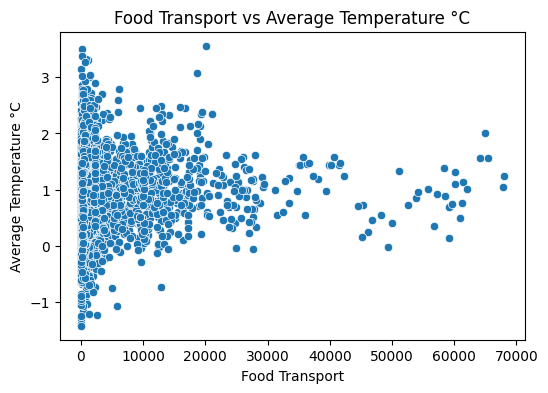

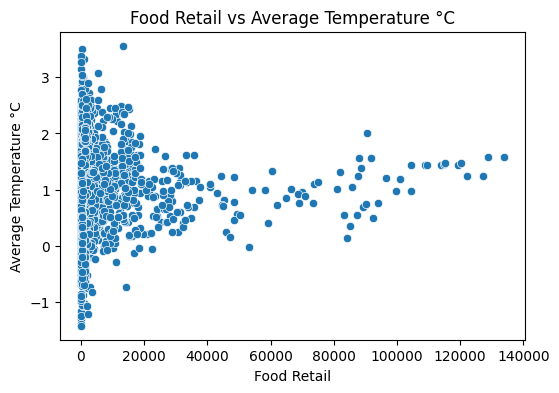

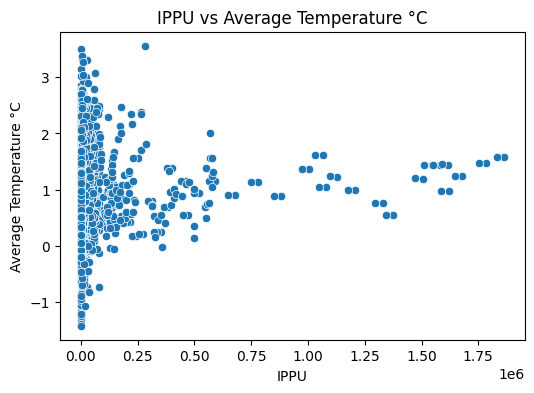

In [31]:
features_to_plot = ["Year", "Food Transport", "Food Retail", "IPPU"]

for feature in features_to_plot:
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df, x=feature, y="Average Temperature °C")
    plt.title(f"{feature} vs Average Temperature °C")
    plt.show()


## 6. Insights and findings 

# 📊 Exploratory Data Analysis (EDA) – Findings

### 1. Summary Statistics
- Dataset has **6965 rows** and no missing values after cleaning.  
- Features vary widely in scale (from small decimal values like *Average Temperature °C* to very large values like *Population* and *IPPU*).  
- Several features are **highly skewed** (Food Transport, Food Retail, IPPU, Population variables).  
- Target variable (*Average Temperature °C*) is reasonably bell-shaped, with values between -1.4 and +3.5.  

---

### 2. Feature Distributions
- Most agricultural and emission-related features are **right-skewed** with extreme outliers.  
- Population variables span from near 0 up to ~900 million → will dominate unless scaled.  
- Total emissions feature has some **negative values**, which may require additional review.  

---

### 3. Correlation Analysis
- **Year** is the strongest predictor of temperature (r ≈ 0.55).  
- Agricultural and food system features (Food Transport, Food Retail, IPPU, Food Processing) show **weak positive correlations** with the target.  
- Population variables are almost perfectly correlated with each other, creating **multicollinearity**.  
- Many features are highly correlated with each other (red blocks in the heatmap), confirming that regularization techniques will be needed.  

---

### 4. Scatterplot Relationships
- **Year vs Temperature** → clear upward trend from 1990–2020.  
- **Food Transport / Food Retail / IPPU vs Temperature** → dense clustering near zero, with weak upward drift at higher values.  

---

### 5. Key Insights
- **Year** shows a strong positive correlation with **Average Temperature °C**, indicating a clear upward trend over time.  
- Agricultural activity features (*Food Transport*, *Food Retail*, *IPPU*) display weak but positive relationships with temperature.  
- Several emissions-related variables have minimal or negative correlations and may not significantly influence the target.  

### 6. Next steps
- Dataset is now **clean and EDA-complete**.  
- Feature scaling will be necessary before modeling (due to wide differences in scale).  
- Multicollinearity means **Ridge and Lasso Regression** should be used alongside standard Linear Regression.  
- Outliers and skewed distributions may affect model performance → consider log transformations or robust models if needed.  

**Conclusion:** Dataset is ready for the **Modeling stage**.  



